In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fruit_dataset.csv')
print(data.shape)
data.head()

(61, 6)


,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [3]:
data.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [4]:
data.fruit_label.value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [5]:
X = data.iloc[:, 2:6]

In [6]:
X

,mass,width,height,color_score
0,192,8.4,7.30,0.55
1,180,8.0,6.80,0.59
2,176,7.4,7.20,0.60
3,86,6.2,4.70,0.80
4,84,6.0,4.60,0.79
...,...,...,...,...
56,116,5.9,8.10,0.73
57,152,6.5,8.50,0.72
58,118,6.1,8.10,0.70
59,201,7.7,10.10,0.71


In [7]:
from scipy.stats import zscore

X = X.apply(zscore)

In [8]:
X.describe()

,mass,width,height,color_score
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,-2.293248e-16,-1.459670e-15,-1.150264e-15,5.573866e-16
std,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00
min,-1.633606e+00,-1.643624e+00,-2.586925e+00,-2.820126e+00
25%,-4.521317e-01,-5.323559e-01,-4.113714e-01,-5.618475e-01
50%,-8.292107e-02,8.501502e-02,-1.394271e-01,-1.633278e-01
75%,2.862895e-01,4.554376e-01,4.044613e-01,6.337118e-01
max,3.646106e+00,3.048396e+00,2.926744e+00,2.227791e+00


In [9]:
y = data.fruit_label

### **Preventing overfitting**

**1. Using Cross validation:**

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the
original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

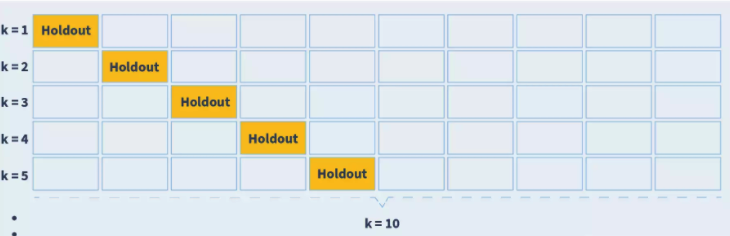



Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a
completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross
validations together.

**2. Train with more data:**

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we
just add more noisy data, then this technique won’t help.

**3. Remove Features**

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or 
unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed 
the patterns that should have been detected, and the data was too complex for the same.

**4. Add Regularization:**

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes!
Regularization is the term for a range of techniques that could be used to force your model into being simpler. 
The techniques used to regularize any model will depend on the model itself. 
For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression,
a penalty parameter could be added. Confusing terms eh? Google them!

### **Identifying overfitting**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
from sklearn import metrics

print('The training model score is:', lr.score(X_train, y_train))
print('The test model score is:', lr.score(X_test, y_test))

The training model score is: 0.8333333333333334
The test model score is: 0.5384615384615384


In [16]:
# Probably the model is learning how to identify apples, orange and lemons and 'ignoring' the mandarin and mango

data.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

### **Solving Overfitting in Our Dataset** : Training with more data

### **Resampling Techniques**

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.


1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

Since our dataset is small and we want to increase it we will use *Upsampling/OverSampling* techique:

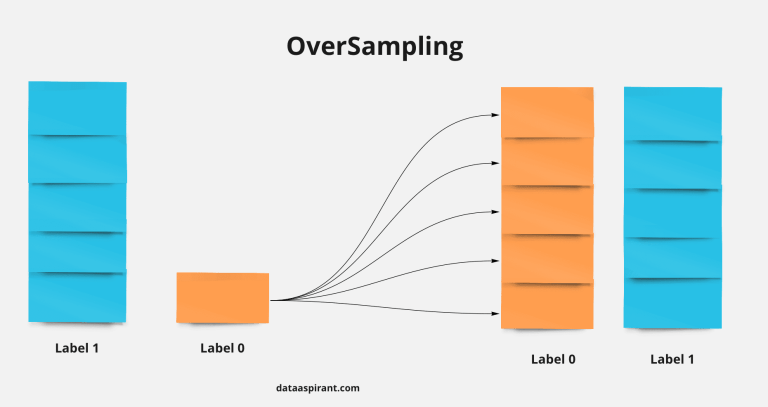

### **Upsample mandarin**

In [17]:
# separate minority and majority classes
from sklearn.utils import resample

mandarin = data[data.fruit_label == 2]
apple = data[data.fruit_label == 1]
sample_size = len(apple)-len(mandarin)

# upsample minority
mandarin_data_upsample = resample(mandarin,
                                  replace=True, #sample with replacement
                                  n_samples=sample_size, #len(apple). Matching number in the majority class
                                  random_state=42)

In [18]:
mandarin_data_upsample

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
5,2,mandarin,80,5.8,4.3,0.77
7,2,mandarin,76,5.8,4.0,0.81
7,2,mandarin,76,5.8,4.0,0.81
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
5,2,mandarin,80,5.8,4.3,0.77
5,2,mandarin,80,5.8,4.3,0.77
7,2,mandarin,76,5.8,4.0,0.81


In [19]:
include = [data, mandarin_data_upsample]

data_upsampled_mandarin = pd.concat(include, axis=0)

In [20]:
# The index is messed up

data_upsampled_mandarin.tail(20)

,fruit_label,fruit_name,mass,width,height,color_score
55,4,lemon,116,6.3,7.70,0.72
56,4,lemon,116,5.9,8.10,0.73
57,4,lemon,152,6.5,8.50,0.72
58,4,lemon,118,6.1,8.10,0.70
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
6,2,mandarin,80,5.9,4.30,0.81
7,2,mandarin,76,5.8,4.00,0.81
5,2,mandarin,80,5.8,4.30,0.77
7,2,mandarin,76,5.8,4.00,0.81


In [21]:
data_upsampled_mandarin = data_upsampled_mandarin.reset_index(drop=True)

In [22]:
data_upsampled_mandarin.tail(20)

,fruit_label,fruit_name,mass,width,height,color_score
55,4,lemon,116,6.3,7.70,0.72
56,4,lemon,116,5.9,8.10,0.73
57,4,lemon,152,6.5,8.50,0.72
58,4,lemon,118,6.1,8.10,0.70
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
61,2,mandarin,80,5.9,4.30,0.81
62,2,mandarin,76,5.8,4.00,0.81
63,2,mandarin,80,5.8,4.30,0.77
64,2,mandarin,76,5.8,4.00,0.81


In [23]:
data_upsampled_mandarin.fruit_name.value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

In [24]:
# separate minority and majority classes
from sklearn.utils import resample

mango = data[data.fruit_label == 5]
apple = data[data.fruit_label == 1]
sample_size = len(apple)-len(mango)

# upsample minority
mango_data_upsample = resample(mango,
                                  replace=True, #sample with replacement
                                  n_samples=sample_size, #len(apple). Matching number in the majority class
                                  random_state=42)

In [25]:
mango_data_upsample

,fruit_label,fruit_name,mass,width,height,color_score
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78


In [26]:
include = [data_upsampled_mandarin, mango_data_upsample]

data_upsampled = pd.concat(include, axis=0)

In [27]:
data_upsampled = data_upsampled.reset_index(drop=True)
data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
87,5,mango,201,7.7,10.10,0.71
88,5,mango,201,7.7,10.10,0.71
89,5,mango,209,8.1,12.11,0.78
90,5,mango,201,7.7,10.10,0.71


In [28]:
data_upsampled.fruit_name.value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

### **New Logistic Regression**

In [29]:
X = data_upsampled.iloc[:, 2:6]
X

,mass,width,height,color_score
0,192,8.4,7.30,0.55
1,180,8.0,6.80,0.59
2,176,7.4,7.20,0.60
3,86,6.2,4.70,0.80
4,84,6.0,4.60,0.79
...,...,...,...,...
87,201,7.7,10.10,0.71
88,201,7.7,10.10,0.71
89,209,8.1,12.11,0.78
90,201,7.7,10.10,0.71


In [30]:
from scipy.stats import zscore

X = X.apply(zscore)

In [31]:
X.describe()

,mass,width,height,color_score
count,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01
mean,-1.170561e-16,-1.122291e-15,-5.261492e-16,2.534205e-15
std,1.005479e+00,1.005479e+00,1.005479e+00,1.005479e+00
min,-1.438704e+00,-1.431912e+00,-1.684929e+00,-3.210571e+00
25%,-7.166096e-01,-1.204977e+00,-3.086495e-01,-7.770177e-01
50%,2.288460e-02,2.701023e-01,-4.227283e-02,5.951625e-02
75%,7.362790e-01,7.239728e-01,8.900457e-01,6.298803e-01
max,3.537657e+00,2.879858e+00,1.915596e+00,2.569118e+00


In [32]:
y = data_upsampled.fruit_label
y

0     1
1     1
2     1
3     2
4     2
     ..
87    5
88    5
89    5
90    5
91    5
Name: fruit_label, Length: 92, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
# training score before upsampling: 0.8333333333333334
# test score before upsampling: 0.5384615384615384

from sklearn import metrics

print('The training model score is:', lr.score(X_train, y_train))
print('The test model score is:', lr.score(X_test, y_test))

The training model score is: 0.821917808219178
The test model score is: 0.7894736842105263


### **Preventing Underfitting:**

**1. Increasing the Complexity of the model:**

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlying patterns in data. Making the switch to say, a non-linear model from a linear model or, say, by adding more hidden layers to your existing neural network could be ways to make the model more complex, and in turn could help in removal of underfitting.

**2. Reducing Regularization:**

Well, underfitting is somewhat close to the opposite of overfitting. So, as we read earlier, regularization could help solve the overfitting problem, then reducing it could solve the underfitting problem! Some of the algorithms you use by default include some regularization parameters meant to suppress overfitting. Sometimes, these could also cause hindrance in the learning of the algorithm. Decreasing their values for the most part, makes a difference. You must be thinking, that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? NO! If the dataset lacks features that are decisive, and important that could help your model in detecting patterns, you can multiply the training data set by 2 or 5, or even 10, but it will not help in making your algorithm better. It is a common notion to think that throwing more data would solve the problem, but as stated earlier, it might just jeopardize the project.

In [37]:
weather_data = pd.read_csv('weather_dataset.csv')
print(weather_data.shape)
weather_data.head()

(25, 2)


,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


In [44]:
X = pd.DataFrame(weather_data['Pressure (millibars)'])
X

,Pressure (millibars)
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49
5,1014.52
6,1014.16
7,1014.24
8,1014.25
9,1013.96


In [45]:
y = pd.DataFrame(weather_data['Humidity'])
y

,Humidity
0,0.62
1,0.66
2,0.79
3,0.82
4,0.83
5,0.85
6,0.83
7,0.78
8,0.72
9,0.61


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn import metrics

print('The training data score is: ', lr.score(X_train, y_train))
print('The test data score is: ', lr.score(X_test, y_test))

The training data score is:  0.29065760334760526
The test data score is:  0.14324706577023627


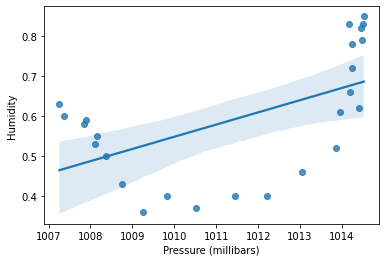

In [55]:
# The data isn't linear

import seaborn as sns

sns.regplot(data=weather_data, x=X, y=y)
plt.show()

### **Increasing the model complexity**

**Moving from just linear features to Polynomial features.**

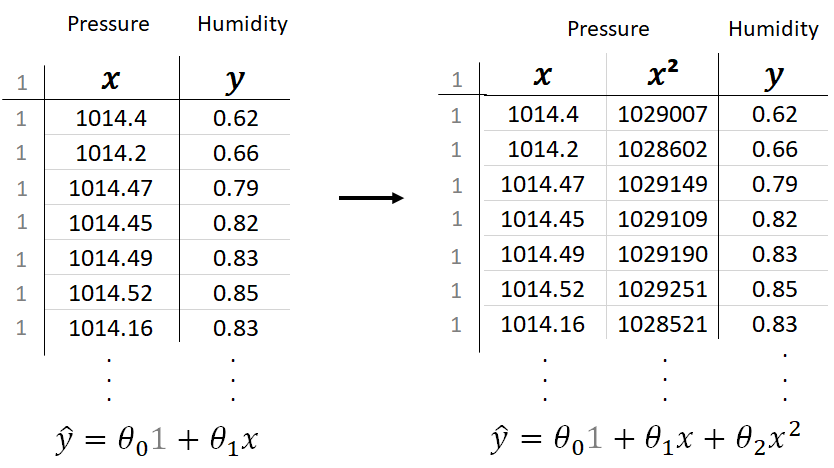

In [56]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree=2)

In [57]:
X_poly = pre_process.fit_transform(X)

In [58]:
X_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [62]:
X_poly = pd.DataFrame(X_poly)
X_poly.columns = ['1', 'x', 'x_squared']
X_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


#### **Implementing Polynomial Regression**

The method here remains the same as multiple linear regression in python, but here we are fitting our regression model on the polynomial features.